# Ïù¥ÎØ∏ÏßÄÏ≤òÎ¶¨

In [3]:
#!pip install opencv-python
#!pip install matplotlib

## Ïù¥ÎØ∏ÏßÄ Î∞ùÍ∏∞ Î∞è Í∞úÏÑ† ÌèâÍ∞Ä

ÌèâÍ∑† Î∞ùÍ∏∞: 127.92
‚òÄÔ∏èÏù¥ÎØ∏ÏßÄÍ∞Ä ÎÑàÎ¨¥ Î∞ùÏäµÎãàÎã§.


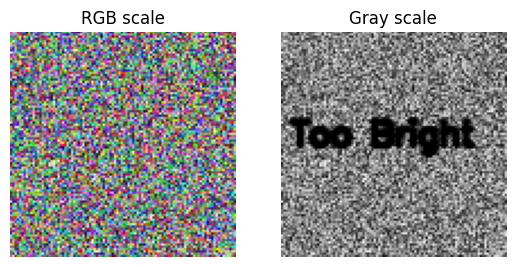

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import cv2                          # ÏõêÎûòÎäî RGBÏù∏Îç∞ CV2Îäî BGRÎ°ú ÎêòÏñ¥ÏûàÏùå. ÌïÑÏöîÏóêÎî∞Îùº Ïª®Î≤ÑÌåÖÌï¥ÏÑú ÏÇ¨Ïö©

# numpyÎ°ú Ï¶âÏÑù Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
img = np.random.randint(0, 256, (100, 100, 3), dtype = np.uint8)             # 100ÌîΩÏÖÄ, 100ÌîΩÏÖÄÏóê Ïª¨Îü¨Í∞Ä 3Í∞úÏù∏ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

# Í∑∏Î†àÏù¥Ïä§ÏºÄÏùº Î≥ÄÌôò (ÏÉâÏÉÅÏùÑ Îã®ÏàúÌôî ÏãúÏºú -> Î∞ùÍ∏∞Î°ú Î≥ÄÌôî)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Ïù¥ÎØ∏ÏßÄÏùò ÌèâÍ∑† Î∞ùÍ∏∞Î•º Í≥ÑÏÇ∞
mean_brightness = np.mean(gray)
print(f"ÌèâÍ∑† Î∞ùÍ∏∞: {mean_brightness:.2f}")

if mean_brightness < 127.5:
    print("üåÉÏù¥ÎØ∏ÏßÄÍ∞Ä ÎÑàÎ¨¥ Ïñ¥Îë°ÏäµÎãàÎã§.")
    gray = cv2.putText(gray.copy(), "Too Dark", (10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255), 2, cv2.LINE_AA)

elif mean_brightness >= 127.9:
    print("‚òÄÔ∏èÏù¥ÎØ∏ÏßÄÍ∞Ä ÎÑàÎ¨¥ Î∞ùÏäµÎãàÎã§.")
    gray = cv2.putText(gray.copy(), "Too Bright", (4,50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0), 2, cv2.LINE_AA)
else:
    print("üòäÏ†ïÏÉÅ Ïù¥ÎØ∏ÏßÄ ÏûÖÎãàÎã§.")

plt.subplot(1, 2, 1)        # (Ìñâ, Ïó¥, )
plt.title("RGB scale")
plt.axis('off')
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title("Gray scale")
plt.imshow(gray, cmap="gray")
plt.axis('off')
plt.show()


## HSV ÏôÄ Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨

#### H - HUE(ÏÉâÏÉÅ) 0~179(ÏõêÎûòÎäî 360 -> OpenCV 180Îã®Í≥ÑÎ°ú Ï§ÑÏûÑ), 2Î°ú ÎÇòÎàî
- Îπ®Í∞ï : 0, 179 Î∂ÄÍ∑º(ÏñëÎÅù)
- ÎÖ∏Îûë : 30
- ÌïòÎäò : 90
- ÌååÎûë : 120
- Î≥¥Îùº : 150
#### S - Saturation(Ï±ÑÎèÑ)
- 0 ~ 255 : Í∞íÏù¥ ÎÇÆÏùÑ ÏàòÎ°ù ÌöåÏÉâ(ÌÉÅÌïúÏÉâ) ÎÜíÏùÑÏàòÎ°ù ÏõêÏÉâ
#### V - Value(Î™ÖÎèÑ)
- 0 ~ 255 : ÏÉâÏùò Î∞ùÍ∏∞, ÎÇÆÏùÑ ÏàòÎ°ù Í≤ÄÏ†ï(0) ÎÜíÏùÑ ÏàòÎ°ù ÏõêÏÉâ

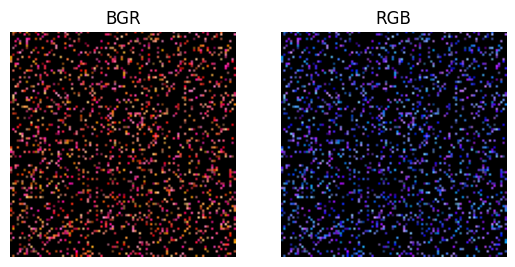

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# numpyÎ°ú Ï¶âÏÑù Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
img = np.random.randint(0, 256, (100, 100, 3), dtype = np.uint8)

hsv_img = cv2.cvtColor(img , cv2.COLOR_BGR2HSV)

# ÌååÎûÄÏÉâ Î≤îÏúÑÎ•º Ï†ïÏùò(HSV)
lower_blue = np.array([100,100,100])
upper_blue = np.array([140,255,255])

# ÎßàÏä§ÌÅ¨
mask = cv2.inRange(hsv_img, lower_blue, upper_blue)

blue_region = cv2.bitwise_and(img, img, mask = mask)
blue_region_rgb = cv2.cvtColor(blue_region, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.title("BGR")
plt.imshow(blue_region)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("RGB")
plt.imshow(blue_region_rgb)
plt.axis('off')
plt.show()

(100, 100, 3)


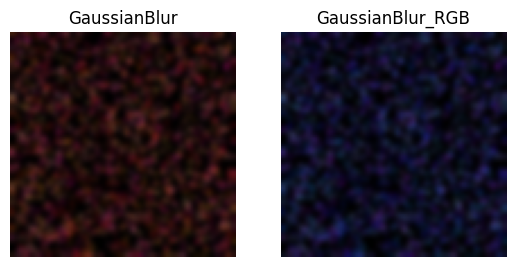

In [96]:
# Í∞ÄÏö∞ÏãúÏïà Î∏îÎü¨ Ï†ÅÏö© (ÎÖ∏Ïù¥Ï¶à Ï†úÍ±∞)
blurred = cv2.GaussianBlur(blue_region,(7,7),0)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

print(blurred.shape)

plt.subplot(1,2,1)
plt.imshow(blurred)
plt.title("GaussianBlur")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(blurred_rgb)
plt.title("GaussianBlur_RGB")
plt.axis('off')

plt.show()

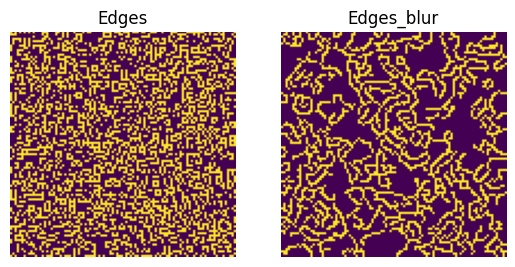

In [97]:
edges = cv2.Canny(blue_region_rgb, 50, 150)  # 50Î≥¥Îã§ ÏûëÏúºÎ©¥ Í∞íÏùÑ Î¨¥Ïãú, 150Î≥¥Îã§ ÌÅ¥Í≤ΩÏö∞ Í∞ïÌïòÍ≤å Ïó£ÏßÄÎ°ú Ïù∏Ï†ï
edges_blur = cv2.Canny(blurred_rgb, 50, 150)  # 50Î≥¥Îã§ ÏûëÏúºÎ©¥ Í∞íÏùÑ Î¨¥Ïãú, 150Î≥¥Îã§ ÌÅ¥Í≤ΩÏö∞ Í∞ïÌïòÍ≤å Ïó£ÏßÄÎ°ú Ïù∏Ï†ï

plt.subplot(1,2,1)
plt.imshow(edges)
plt.title("Edges")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges_blur)
plt.title("Edges_blur")
plt.axis('off')

plt.show()

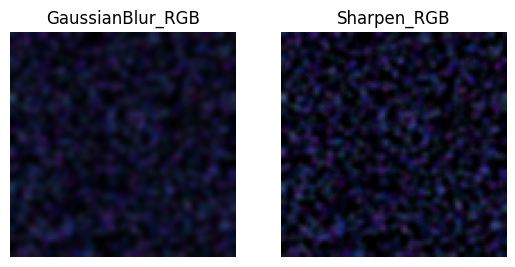

In [101]:
# blurred

# 3X3 ÏÑ†Î™ÖÌôî Ïª§ÎÑê
sharp_kernel = np.array([
    [0, -1,  0],
    [-1, 5, -1],
    [0, -1,  0]
])

sharpen = cv2.filter2D(blurred, -1, sharp_kernel)
sharpen_rgb = cv2.cvtColor(sharpen, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(blurred_rgb)
plt.title("GaussianBlur_RGB")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sharpen_rgb)
plt.title("Sharpen_RGB")
plt.axis('off')

plt.show()

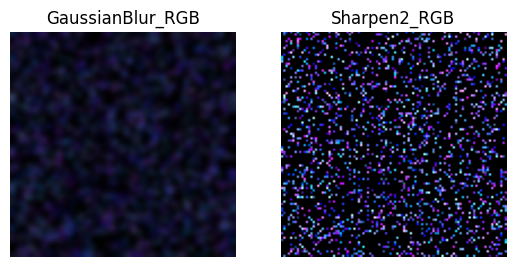

In [ ]:
# Í≥†Í∏â ÏÑ†Î™ÖÌôî Í∏∞Î≤ï

# blue_region
# blurred

sharpen2 = cv2.addWeighted(blue_region, 1.5, blurred, -0.5, 0)
sharpen2_rgb = cv2.cvtColor(sharpen2, cv2.COLOR_BGR2RGB)


plt.subplot(1,2,1)
plt.imshow(blurred_rgb)
plt.title("GaussianBlur_RGB")
plt.axis('off')

plt.subplot(1,2,3)
plt.imshow(sharpen2_rgb)
plt.title("Sharpen2_RGB")
plt.axis('off')

plt.show()